# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hilda Desfianty Arifin
- **Email:** hildaarifien@gmail.com
- **ID Dicoding:** hildaarfnn

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana perubahan jumlah pengguna sepeda di setiap musim (season)?
- 2. Kapan waktu (jam) penyewaan sepeda tertinggi dalam pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [44]:
# Data tabel day

day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
# Data tabel hour

hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- instant: Indeks rekaman, memberikan nomor urut untuk setiap entri dalam dataset.
- dteday: Tanggal dari data, menunjukkan hari spesifik dalam format YYYY-MM-DD.

- hr: Jam penyewaan, dalam format 0 hingga 23, menunjukkan waktu spesifik dalam sehari.

- season: Musim saat penyewaan terjadi, dengan nilai:
1: Musim Semi (Spring)
2: Musim Panas (Summer)
3: Musim Gugur (Fall)
4: Musim Dingin (Winter)

- yr: Tahun penyewaan, dengan nilai:
0: 2011
1: 2012
- mnth: Bulan penyewaan, dari 1 hingga 12.

- holiday: Menunjukkan apakah hari tersebut adalah hari libur (0: tidak, 1: ya).

- weekday: Hari dalam seminggu, dengan nilai dari 0 (Minggu) hingga 6 (Sabtu).

- workingday: Menunjukkan apakah hari tersebut adalah hari kerja (1: ya, 0: tidak), di mana hari kerja didefinisikan sebagai hari yang bukan akhir pekan atau hari libur.

- weathersit: Kondisi cuaca saat penyewaan terjadi, dengan nilai:
1: Cerah, beberapa awan
2: Berkabut + Berawan
3: Hujan ringan + Petir + Berawan
4: Hujan deras + Es + Petir + Berkabut
- temp: Suhu normalisasi dalam Celsius, dinormalisasi antara 0 dan 1 berdasarkan suhu minimum dan maksimum.

- atemp: Suhu terasa (perceived temperature) dalam Celsius, juga dinormalisasi antara 0 dan 1.

- hum: Kelembaban normalisasi, dinormalisasi antara 0 dan 1.

- windspeed: Kecepatan angin normalisasi, dinormalisasi antara 0 dan 1.

- casual: Jumlah pengguna casual yang menyewa sepeda.

- registered: Jumlah pengguna terdaftar yang menyewa sepeda.

- cnt: Total jumlah sepeda yang disewa, mencakup pengguna casual dan terdaftar.

### Assessing Data

In [46]:
# Memeriksa tipe data pada data day

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
# Memeriksa tipe data pada data hour

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
# Memeriksa missing value

day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [49]:
# Cek nilai duplikasi dan parameter statistik pada data day

print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [50]:
# Cek nilai duplikasi dan parameter statistik pada data hour

print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada kedua dataset, ditemukan kesalahan tipe data pada kolom "dteday", yang seharusnya bertipe data 'datetime'.
- Tidak ditemukan missing value pada kedua dataset.
- Tidak ditemukan nilai yang duplikat pada kedua dataset.
- Tidak ditemukan keanehan pada parameter statistik kedua dataset.

### Cleaning Data

In [51]:
# Merubah tipe data dteday pada data day menjadi datetime

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

# Cek
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [52]:
# Merubah tipe data dteday pada data hour menjadi datetime

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

# Cek
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [53]:
day_df.to_csv("day_data.csv", index=False)

In [54]:
hour_df.to_csv("hour_data.csv", index=False)

**Insight:**
- Tipe data 'dteday' yang sebelumnya bertipe data integer diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [55]:
# Tampilkan 5 data day

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [56]:
# Parameter statistik day

day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [57]:
# Demografi jumlah penyewaan by season

day_df.groupby(by="season").agg({
    "cnt": ["count", "max", "min", "mean"]
})

cnt                         
       count   max   min         mean
season                               
1        181  7836   431  2604.132597
2        184  8362   795  4992.331522
3        188  8714  1115  5644.303191
4        178  8555    22  4728.162921

In [58]:
# Menghitung total penyewaan sepeda (cnt) berdasarkan musim
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Menampilkan hasil
seasonal_rentals.columns = ['Season', 'Total Rentals']
print(seasonal_rentals)

# Catatan mengenai arti setiap season
season_notes = {
    1: "Musim Dingin (Winter)",
    2: "Musim Semi (Spring)",
    3: "Musim Panas (Summer)",
    4: "Musim Gugur (Autumn)"
}

print("\nSeason:")
for season, note in season_notes.items():
    print(f"Season {season}: {note}")

   Season  Total Rentals
0       1         471348
1       2         918589
2       3        1061129
3       4         841613

Season:
Season 1: Musim Dingin (Winter)
Season 2: Musim Semi (Spring)
Season 3: Musim Panas (Summer)
Season 4: Musim Gugur (Autumn)


In [59]:
# Tampilkan 5 data hour

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
# Parameter statistik hour

hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [61]:
# Melakukan analisis demografi total penyewaan tiap jam dalam sehari

hour_df.groupby(by="hr").agg({
    "cnt": ["count", "max", "min", "mean"]
}).reset_index()

hr   cnt                     
       count  max min        mean
0    0   726  283   2   53.898072
1    1   724  168   1   33.375691
2    2   715  132   1   22.869930
3    3   697   79   1   11.727403
4    4   697   28   1    6.352941
5    5   717   66   1   19.889819
6    6   725  213   1   76.044138
7    7   727  596   1  212.064649
8    8   727  839   5  359.011004
9    9   727  426  14  219.309491
10  10   727  539   8  173.668501
11  11   727  663  10  208.143054
12  12   728  776   3  253.315934
13  13   729  760  11  253.661180
14  14   729  750  12  240.949246
15  15   729  750   7  251.233196
16  16   730  783  11  311.983562
17  17   730  976  15  461.452055
18  18   728  977  23  425.510989
19  19   728  743  11  311.523352
20  20   728  567  11  226.030220
21  21   728  584   6  172.314560
22  22   728  502   9  131.335165
23  23   728  256   2   87.831044

In [62]:
# Menghitung total penyewaan sepeda sehari dalam waktu 2011-2012

grouped_df = hour_df.groupby('hr')['cnt'].sum().reset_index()
print("Total Penyewaan Sepeda dalam Sehari Kurun Waktu 2011-2012\n")
print(grouped_df)

Total Penyewaan Sepeda dalam Sehari Kurun Waktu 2011-2012

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [63]:
# Filter data untuk tahun 2011

data_2011 = hour_df[hour_df['dteday'].dt.year == 2011]
print(data_2011)

      instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0           1 2011-01-01       1   0     1   0        0        6           0   
1           2 2011-01-01       1   0     1   1        0        6           0   
2           3 2011-01-01       1   0     1   2        0        6           0   
3           4 2011-01-01       1   0     1   3        0        6           0   
4           5 2011-01-01       1   0     1   4        0        6           0   
...       ...        ...     ...  ..   ...  ..      ...      ...         ...   
8640     8641 2011-12-31       1   0    12  19        0        6           0   
8641     8642 2011-12-31       1   0    12  20        0        6           0   
8642     8643 2011-12-31       1   0    12  21        0        6           0   
8643     8644 2011-12-31       1   0    12  22        0        6           0   
8644     8645 2011-12-31       1   0    12  23        0        6           0   

      weathersit  temp   atemp   hum  w

In [64]:
# Menghitung total jam penyewaan dalam sehari dalam 1 tahun (2011)

grouped_2011 = data_2011.groupby('hr')['cnt'].sum().reset_index()
print(grouped_2011)

    hr     cnt
0    0   15540
1    1    9558
2    2    6661
3    3    3441
4    4    1817
5    5    5157
6    6   20801
7    7   56930
8    8   95467
9    9   59486
10  10   47511
11  11   56598
12  12   69198
13  13   69339
14  14   66482
15  15   68590
16  16   85622
17  17  127632
18  18  116985
19  19   85802
20  20   62818
21  21   48875
22  22   37677
23  23   25116


In [65]:
# Filter data untuk tahun 2012

data_2012 = hour_df[hour_df['dteday'].dt.year == 2012]
print(data_2012)

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
8645      8646 2012-01-01       1   1     1   0        0        0           0   
8646      8647 2012-01-01       1   1     1   1        0        0           0   
8647      8648 2012-01-01       1   1     1   2        0        0           0   
8648      8649 2012-01-01       1   1     1   3        0        0           0   
8649      8650 2012-01-01       1   1     1   4        0        0           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   a

In [66]:
# Menghitung total jam penyewaan dalam sehari dalam 1 tahun (2011)

grouped_2012 = data_2012.groupby('hr')['cnt'].sum().reset_index()
print(grouped_2012)

    hr     cnt
0    0   23590
1    1   14606
2    2    9691
3    3    4733
4    4    2611
5    5    9104
6    6   34331
7    7   97241
8    8  165534
9    9   99952
10  10   78746
11  11   94722
12  12  115216
13  13  115580
14  14  109170
15  15  114559
16  16  142126
17  17  209228
18  18  192787
19  19  140987
20  20  101732
21  21   76570
22  22   57935
23  23   38825


**Insight:**
- Pada data set day.csv, pertama menampilkan parameter statistik, demografi penyewaan berdasarkan season dan menghitung total penyewaan berdasarkan season.
- Pada data set hour.csv, pertama menampilkan parameter statistik, demografi total penyewaan berdasarkan jam dalam sehari, menghitung total penyewaan dalam kurun waktu 2011-2012, memfilter jumlah penyewaan dalam waktu 2011 dan dalam waktu 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan jumlah pengguna sepeda di setiap musim (season)?

<ipython-input-67-d3d8cb43107e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Rentals', data=seasonal_rentals, palette='viridis')


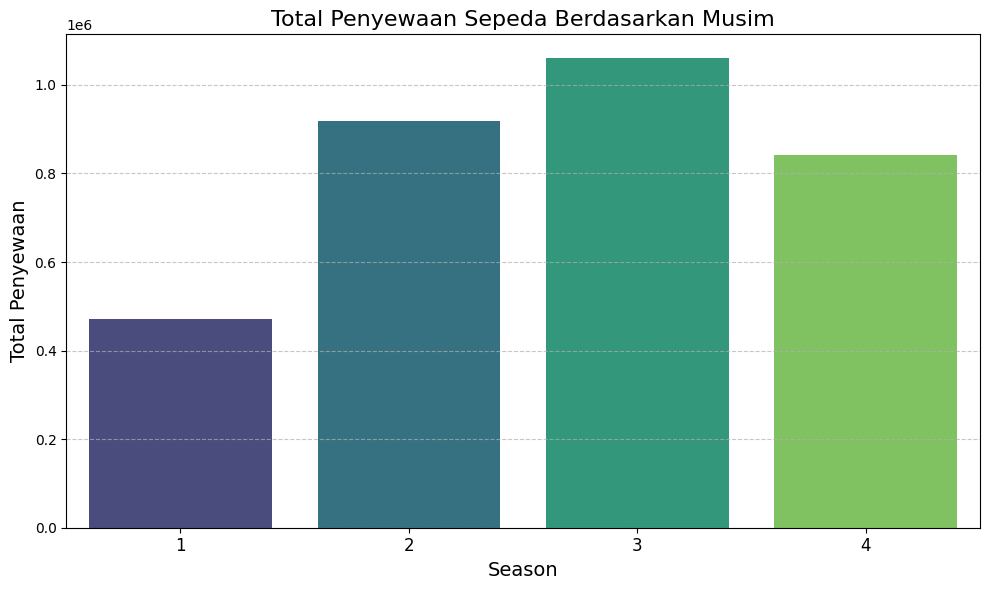


Total Penyewaan Sepeda Berdasarkan Musim:
1. Musim Dingin (Winter): 471348 penyewaan.
2. Musim Semi (Spring): 918589 penyewaan.
3. Musim Panas (Summer): 1061129 penyewaan.
4. Musim Gugur (Fall): 841613 penyewaan.


In [67]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Rentals', data=seasonal_rentals, palette='viridis')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(ticks=range(len(seasonal_rentals)), labels=['1', '2', '3', '4'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Analisis Eksplanatori
season_notes = {
    1: "Musim Dingin (Winter)",
    2: "Musim Semi (Spring)",
    3: "Musim Panas (Summer)",
    4: "Musim Gugur (Fall)"
}

print("\nTotal Penyewaan Sepeda Berdasarkan Musim:")
for index, row in seasonal_rentals.iterrows():
    season_name = season_notes[row['Season']]  # Mendapatkan nama musim berdasarkan season
    print(f"{row['Season']}. {season_name}: {row['Total Rentals']} penyewaan.")

### Pertanyaan 2: Kapan waktu (jam) penyewaan sepeda tertinggi dalam pada tahun 2011 dan 2012

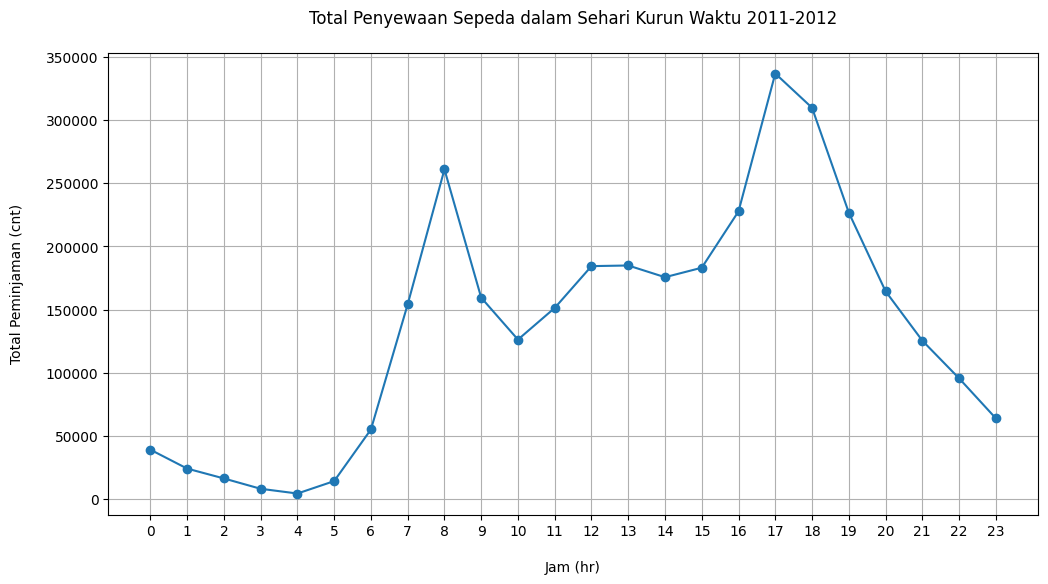

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['hr'], grouped_df['cnt'], marker='o')
plt.title('Total Penyewaan Sepeda dalam Sehari Kurun Waktu 2011-2012\n')
plt.xlabel('\nJam (hr)')
plt.ylabel('Total Peminjaman (cnt)\n')
plt.xticks(grouped_df['hr'])
plt.grid(True)
plt.show()

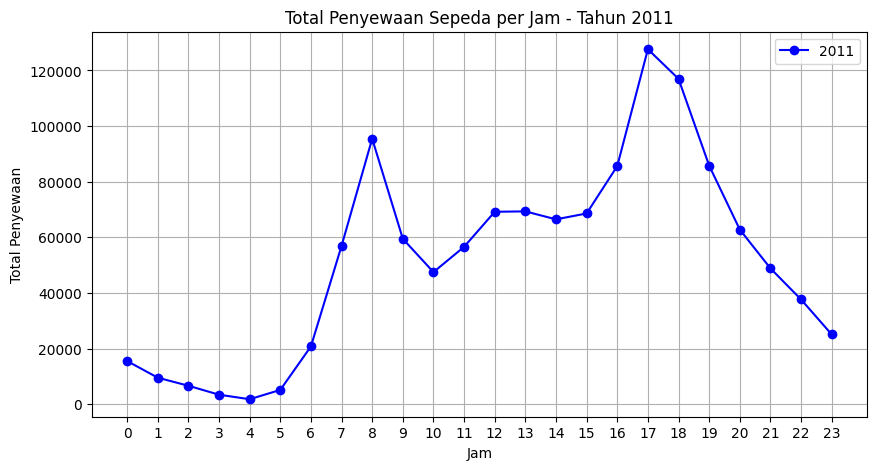

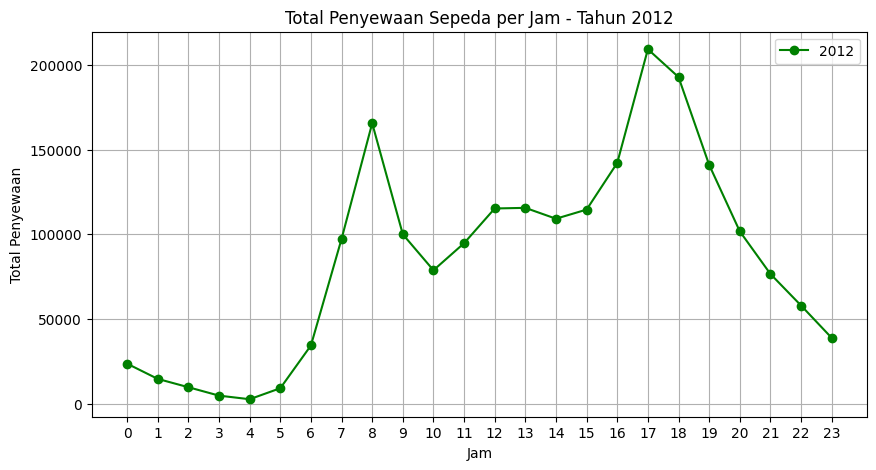

In [69]:
# Membuat line chart untuk tahun 2011 di kanvas pertama
plt.figure(figsize=(10, 5))
plt.plot(grouped_2011['hr'], grouped_2011['cnt'], label='2011', marker='o', color='blue')
plt.title('Total Penyewaan Sepeda per Jam - Tahun 2011')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(grouped_2011['hr'])  # Memastikan semua jam ditampilkan
plt.grid(True)
plt.legend()

# Menampilkan plot pertama
plt.show()

# Membuat line chart untuk tahun 2012 di kanvas kedua
plt.figure(figsize=(10, 5))
plt.plot(grouped_2012['hr'], grouped_2012['cnt'], label='2012', marker='o', color='green')
plt.title('Total Penyewaan Sepeda per Jam - Tahun 2012')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(grouped_2012['hr'])  # Memastikan semua jam ditampilkan
plt.grid(True)
plt.legend()

# Menampilkan plot kedua
plt.show()

**Insight:**
- Pada pertanyaan 1, memvisualisasikan total penyewaan berdasarkan musim/season. Hasilnya, total penyewaan sepeda terendah dilakukan selama musim winter dan pada musim summer, angka penyewaan sepeda melambung tinggi.
- Pada pertanyaan 2, divisualisasikan Total Penyewaan Sepeda dalam Sehari pada tahun 2011 dan 2012

## Analisis Lanjutan (Opsional)

CLUSTERING KATEGORI JUMLAH PENYEWAAN SEPEDA 2011-2012

In [70]:
# Gabungkan data untuk analisis
combined_data = pd.DataFrame({
    'Hour': grouped_2011['hr'].tolist() + grouped_2012['hr'].tolist(),
    'Total_Rentals': grouped_2011['cnt'].tolist() + grouped_2012['cnt'].tolist(),
    'Year': ['2011'] * len(grouped_2011) + ['2012'] * len(grouped_2012)
})

# Clustering berdasarkan kategori jumlah penyewaan
def categorize_rentals(row):
    if row['Total_Rentals'] < 5000:
        return 'Rendah'
    elif 5000 <= row['Total_Rentals'] < 20000:
        return 'Sedang'
    else:
        return 'Tinggi'

combined_data['Cluster'] = combined_data.apply(categorize_rentals, axis=1)
print(combined_data)

    Hour  Total_Rentals  Year Cluster
0      0          15540  2011  Sedang
1      1           9558  2011  Sedang
2      2           6661  2011  Sedang
3      3           3441  2011  Rendah
4      4           1817  2011  Rendah
5      5           5157  2011  Sedang
6      6          20801  2011  Tinggi
7      7          56930  2011  Tinggi
8      8          95467  2011  Tinggi
9      9          59486  2011  Tinggi
10    10          47511  2011  Tinggi
11    11          56598  2011  Tinggi
12    12          69198  2011  Tinggi
13    13          69339  2011  Tinggi
14    14          66482  2011  Tinggi
15    15          68590  2011  Tinggi
16    16          85622  2011  Tinggi
17    17         127632  2011  Tinggi
18    18         116985  2011  Tinggi
19    19          85802  2011  Tinggi
20    20          62818  2011  Tinggi
21    21          48875  2011  Tinggi
22    22          37677  2011  Tinggi
23    23          25116  2011  Tinggi
24     0          23590  2012  Tinggi
25     1    

## Conclusion

- Conclution pertanyaan 1: Bagaimana perubahan jumlah pengguna sepeda di setiap musim (season)?

Pada analisa data, dihasilkan jumlah pengguna sepeda tiap musim sebagai berikut:
1. Season 1(Winter): 471348
2. Season 2(Spring): 918589
3. Season 3(Summer): 1061129
4. Season 4 (Autumn): 841613

Dari hasil tersebut, dapat disimpulkan jika jumlah pengguna sepeda pada musim winter sangat sedikit dan sebaliknya, jumlah ini akan menaik ketika musim panas. Hal ini mungkin dikarenakan pada musim winter jumlah pengguna sepeda sedikit karena faktor suhu rendah dan kondisi jalanan yang licin memungkinkan pengguna jarang yang menggunakan sepeda. Sedangkan pada musim summer, dikarenakan faktor suhu yang tinggi dan panas, memungkinkan pengguna banyak yang mengandalkan sepeda untuk beraktifitas agar lebih cepat sampai tujuan.



- Conclution pertanyaan 2: Kapan waktu (jam) penyewaan sepeda tertinggi dalam pada tahun 2011 dan 2012?

Hasil dalam analisa data, menunjukan bahwa pada kurun waktu 2011 dan 2012, aktifitas penyewaan sepeda sama-sama paling banyak dilakukan pada waktu 17.00-18.00. Hal ini mungkin karena pada pukul tersebut, banyak orang yang sudah selesai dengan aktifitasnya dan menyewa sepeda sekadar untuk pulang ke tujuan atau untuk bersepeda santai.